## Creating histograms.
We had a brief look at ggplot2 and creating histograms. Now it is your turn!\
Replace _ to complete expressions and return the correct answer\
Restart R to remove previous results using: Ctrl/Cmd + shift + F10\
Remember - try to use google to help you answer questions

In [4]:
# Load the tidyverse package with contains ggplot2
library(ggplot2)

#### 1. Histograms
We will examine the weight distribution by gender in a hospital dataset.\
The columns of interest are: weight and gender

##### 1.1 Import the hospital.txt dataset, which is tab-delimited

In [ ]:
hospital <- read.delim(file = "../data/hospital.txt", sep = "\t")
head(hospital)

,episode_start_date,gender,age,weight,area_residence,diagnosis_code1,diagnosis_code2,diagnosis_code3,diagnosis_code4,diagnosis_code5,⋯,procedure_code1,procedure_code2,procedure_code3,procedure_code4,procedure_code5,procedure_code6,procedure_code7,procedure_code8,procedure_code9,procedure_code10
,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,19/09/2023,F,28,62,G,F.1,NA,NA,NA,NA,⋯,Z.3,T.5,W.6,X.5,W.4,NA,NA,NA,NA,NA
2,19/10/2023,M,50,82,C,C.4,A.3,B.8,NA,NA,⋯,W.6,V.2,Y.9,Z.7,W.10,NA,NA,NA,NA,NA
3,16/10/2023,F,66,53,A,H.8,I.1,NA,NA,NA,⋯,U.9,T.6,Z.3,Y.2,Y.8,NA,NA,NA,NA,NA
4,11/02/2023,M,75,69,A,F.2,F.8,NA,NA,NA,⋯,T.6,X.4,W.2,Z.1,X.7,NA,NA,NA,NA,NA
5,18/12/2023,F,38,66,B,C.2,NA,NA,NA,NA,⋯,Y.9,X.1,V.4,V.8,X.7,NA,NA,NA,NA,NA
6,25/01/2023,F,39,54,I,C.9,NA,NA,NA,NA,⋯,X.5,V.3,V.3,Y.10,Z.9,NA,NA,NA,NA,NA


Remember\
we use + to add layers to ggplot()\
geom_histogram()\
fill= controls bar colour\
alpha= controls the transparency\

##### 1.2 Create a histogram of weight

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


[1] 67.7

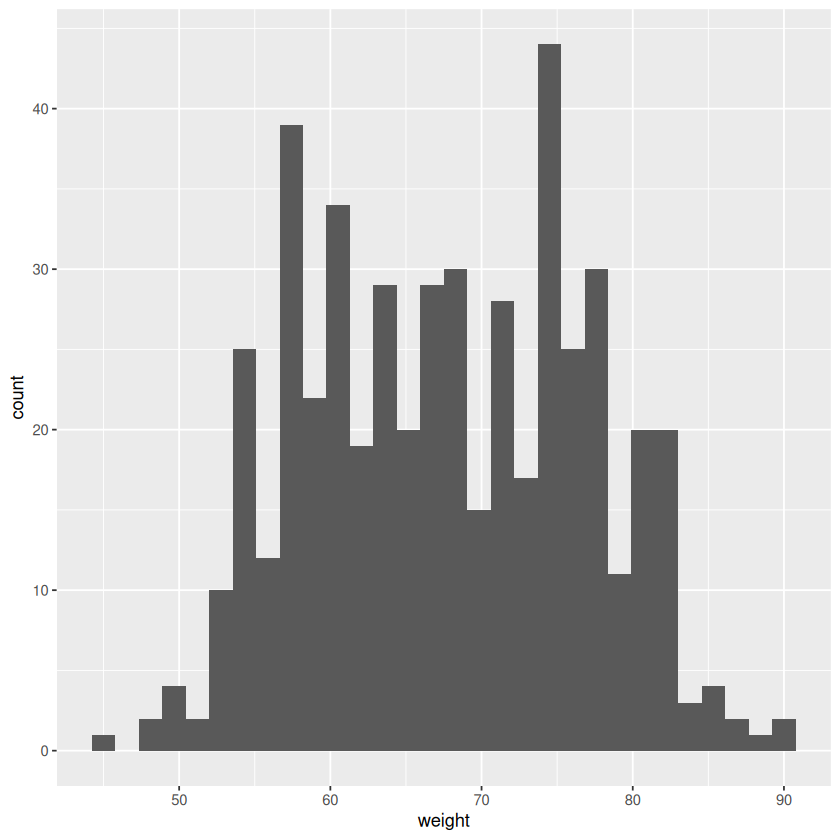

In [ ]:
hospital |>
  ggplot(aes(x = weight)) +
  geom_histogram()
mean(hospital$weight)

##### 1.3 Alter the binwidth
Alter the code to create histograms with different binwidths, and examine\
whether you can conclusions about the distribution of the data e.g. uni-modal/bi-modal,\
or skewed.\
\
Try the bin widths:
  - 20 kg (binwidth = 20)
  - 10 kg
  - 1 kg

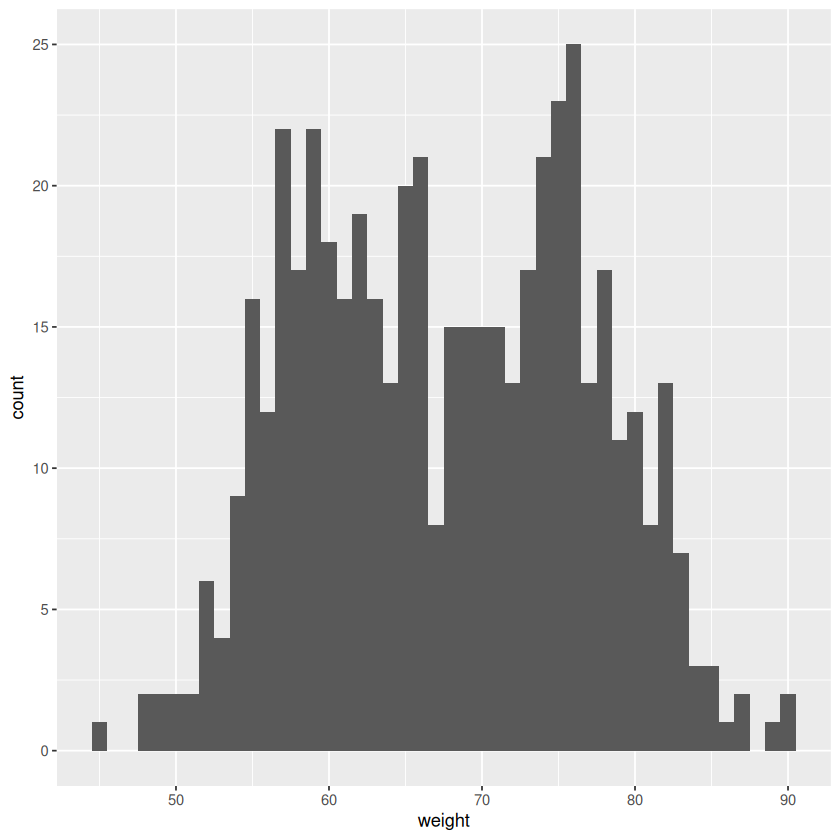

In [7]:
hospital |>
  ggplot(aes(x = weight)) +
  geom_histogram(binwidth = 1)

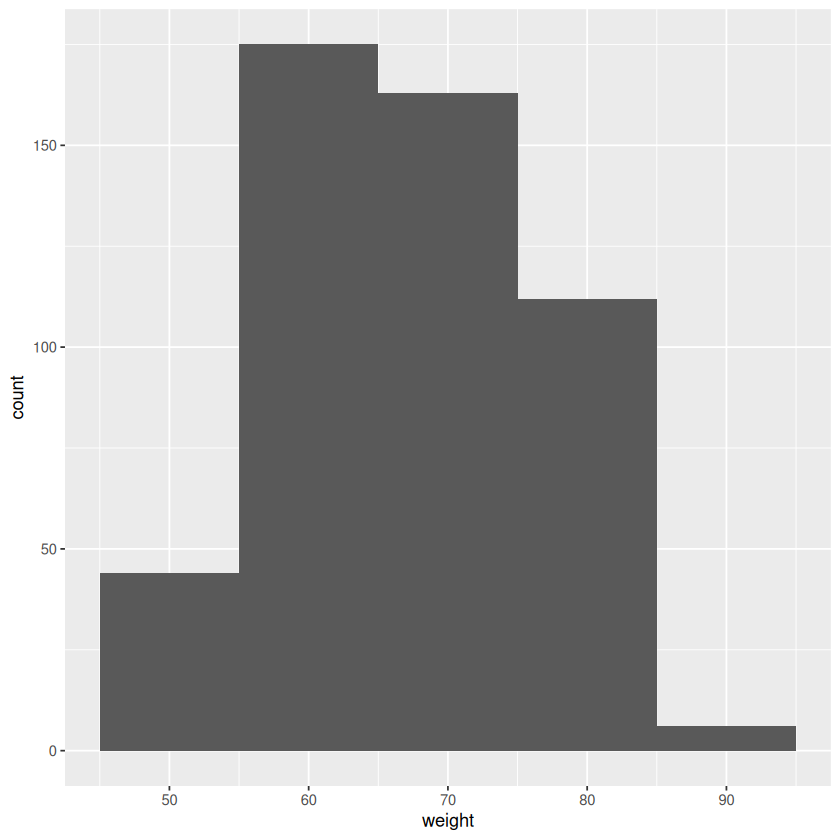

In [8]:
hospital |>
  ggplot(aes(x = weight)) +
  geom_histogram(binwidth = 10)

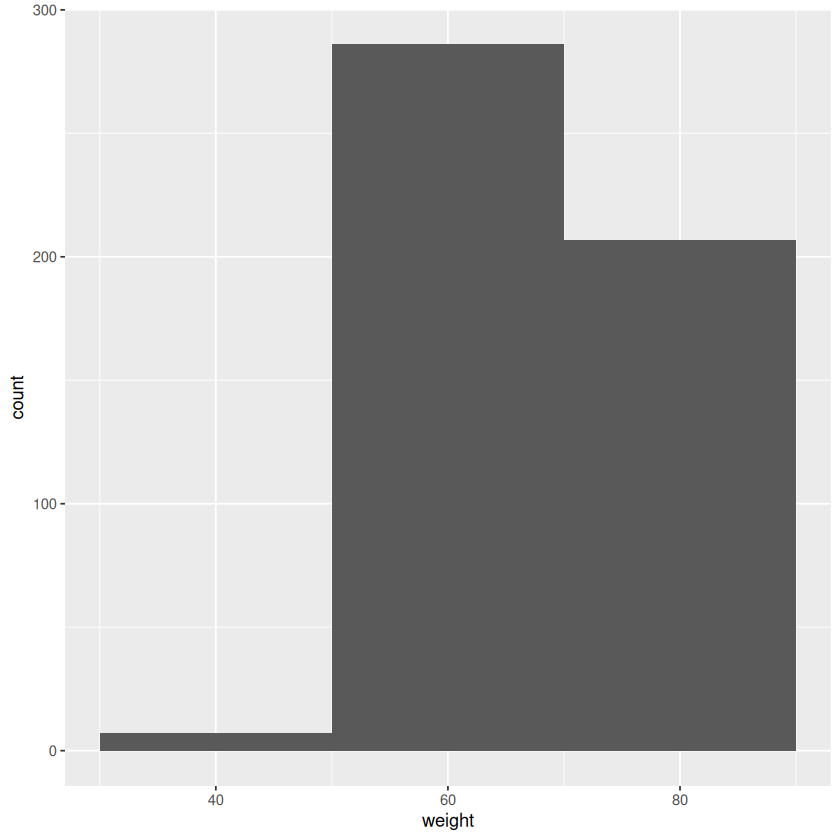

In [9]:
hospital |>
  ggplot(aes(x = weight)) +
  geom_histogram(binwidth = 20)

##### 1.4 Colour by gender
Update the code to create a fill aesthetic by gender i.e. make the bar colours\
by gender

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


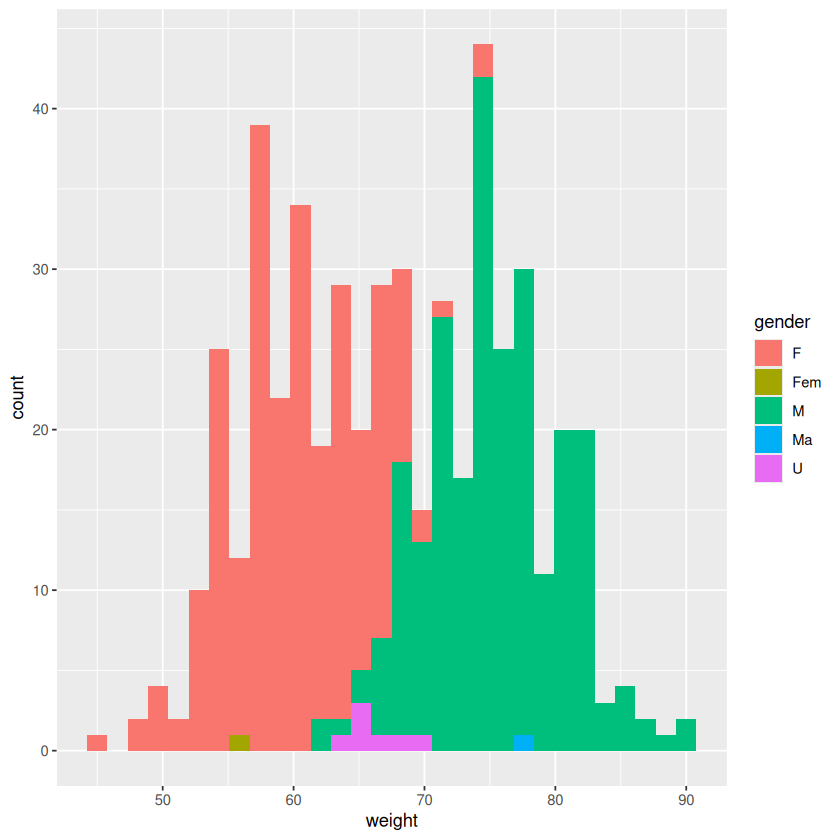

In [ ]:
hospital |>
  ggplot(aes(x = weight, fill = gender)) +
  geom_histogram()

Ok, there are some groups in gender that we want to remove.\
Include only data from gender equal to 'F' or 'M'

In [11]:
library(dplyr)
hospital |>
  count(gender)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




gender,n
<chr>,<int>
F,248
Fem,1
M,243
Ma,1
U,7


***-> Create a new dataframe with just the registers that contain 'M' or 'F' in the gender field.***

In [ ]:
hospital_fm <-
  hospital |>
  filter(gender %in% c("M", "F"))

Remake the histogram coloured by gender\
note: the fill is inside the aes() function

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


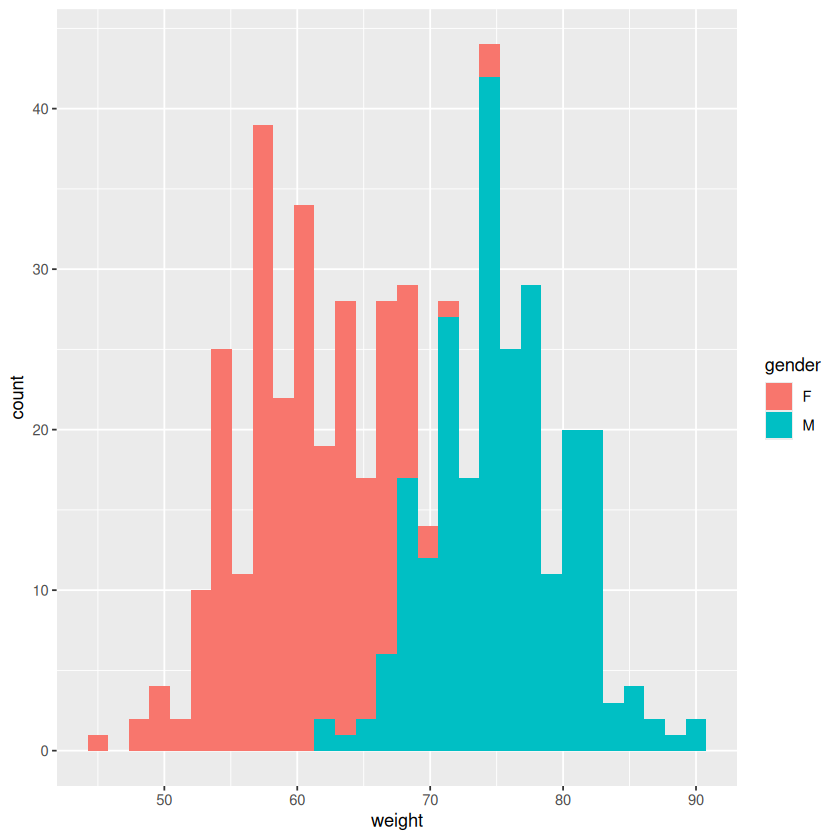

In [ ]:
hospital_fm |>
  ggplot(aes(x = weight, fill = gender)) +
  geom_histogram()

Notice at x values > 60 & < 75, the F bars are placed on top of the M bars?\
This is a result of the default 'position' argument of geom_histogram()\
?geom_histogram

##### 1.5 Fixing the plot
We do not wanted 'stack'ed bars but their true value. We can do this using\
position="identity".\
Update the code to change the position argument to "identity"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


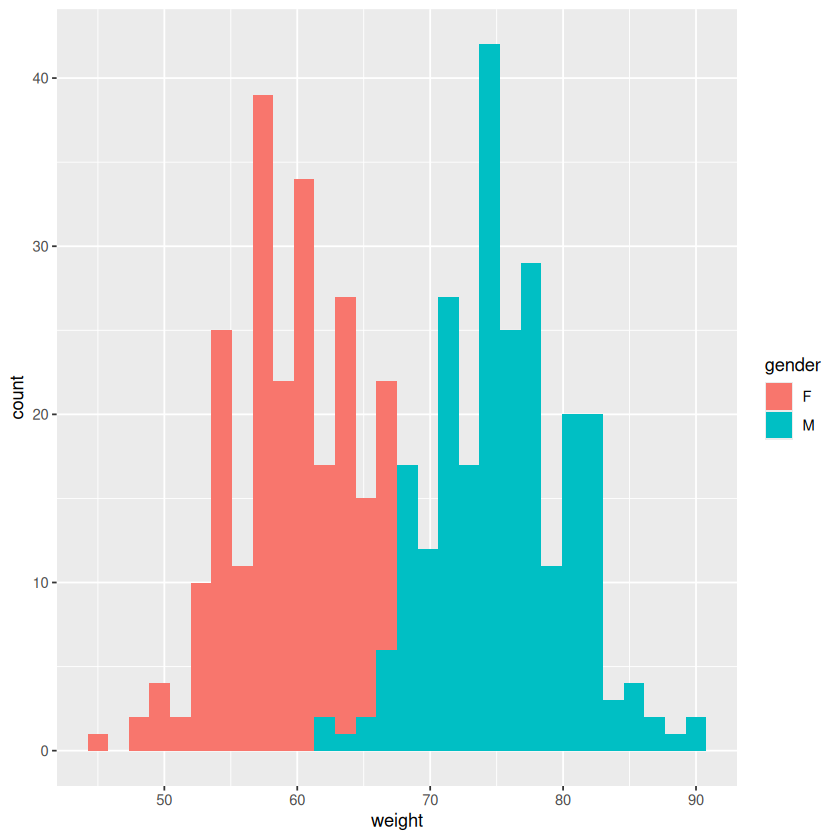

In [ ]:
hospital_fm |>
  ggplot(aes(x = weight, fill = gender)) +
  geom_histogram(position = "identity")

However, now the M bars are covering the F bars (overplotting)\
Can you think of a way to allow the bars to be shown from all the groups?\
Hint: Think about the colour transparency...

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


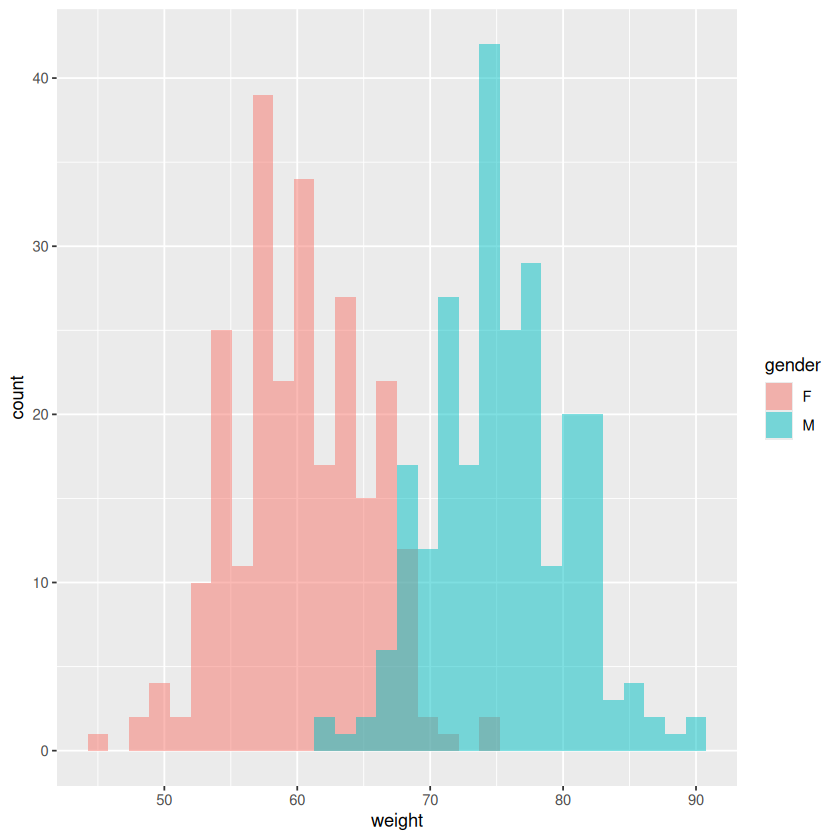

In [ ]:
hospital_fm |>
  ggplot(aes(x = weight, fill = gender)) +
  geom_histogram(position = "identity", alpha = 0.5)

##### 1.6 Export the plot
We can use ggsave to export the last ggplot observed in RStudio\
Export the last plot to the "outputs" folder as "weights_histogram.png"\
Examine it outside of RStudio

In [ ]:
ggsave(filename = "../outputs/weigths_histogram.png",
       plot = last_plot(),
       width = 120, height = 100, units = "mm")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


##### 1.7 Using facets
Another method is to create multiple histograms in different panels (facets)\
rather than coloring them in the same plot. Use facet_wrap() to create the\
histograms in different panels by gender.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


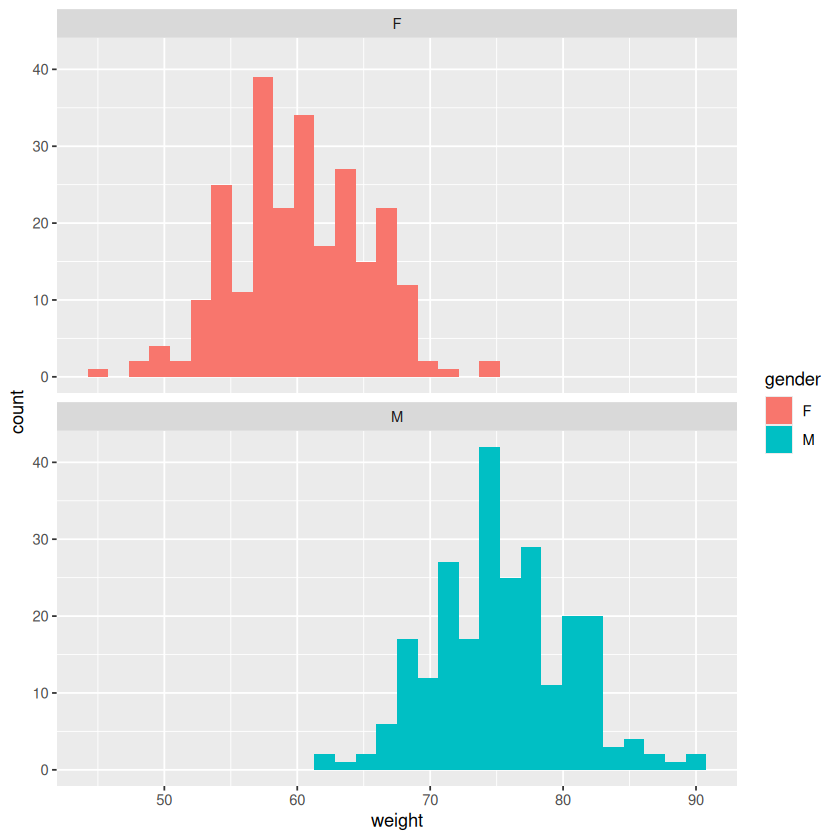

In [ ]:
hospital_fm %>%
  ggplot(aes(x = weight, fill = gender)) +
  geom_histogram() +
  facet_wrap(facets = vars(gender), ncol = 1)

---
## 2 Extra exercises

#### 2.1 faithful
faithful is a R dataset on the waiting time between eruptions and the duration \
of the eruption for the Old Faithful geyser in Yellowstone National Park, Wyoming, USA.\
?faithfu\
Create a histogram of the eruption times in minutes column (eruptions)\
Colour the bars black, and make them have a white outline\
Add x and y axis title: x = Frequency of eruptions, y = Duration (minutes)

In [20]:
head(faithful)

,eruptions,waiting
,<dbl>,<dbl>
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85
6,2.883,55


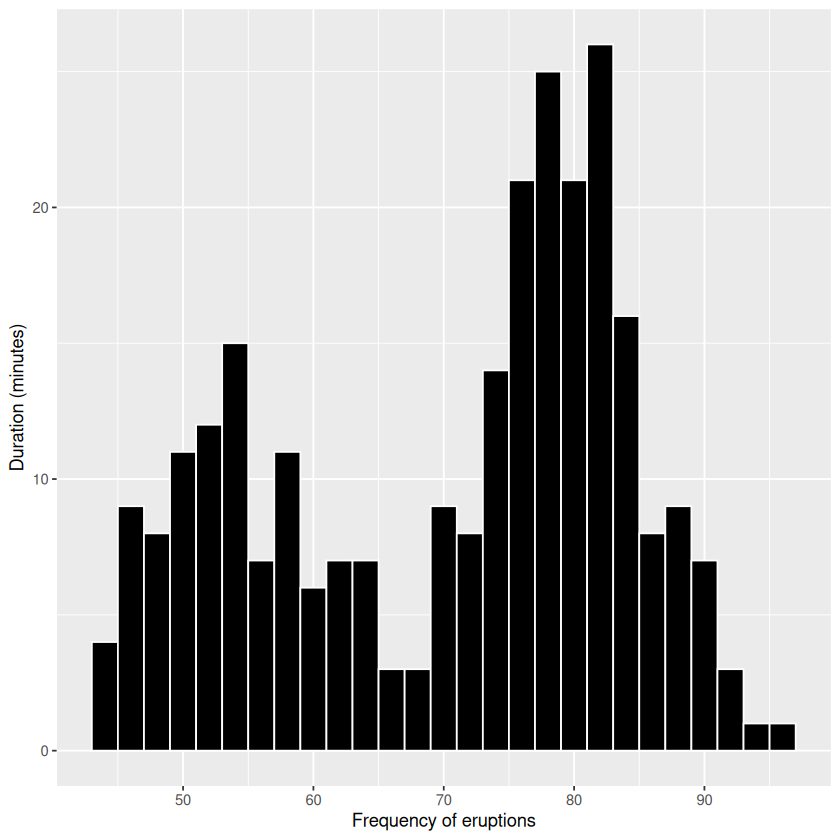

In [29]:
faithful |>
  ggplot(aes(x = waiting)) +
  geom_histogram(
                 binwidth = 2,
                 fill = "black",
                 color = "white") +
  labs(
       x = "Frequency of eruptions",
       y = "Duration (minutes)")

---
#### 2.2 penguins
Create a histogram of body mass and use facets to seperate the species
Are the distributions of body mass among penguins species similar?

In [31]:
penguins <- readr::read_csv(file = "../data/penguins.csv")
head(penguins, n = 3)

Rows: 344 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): species, island, sex
dbl (5): bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, year

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


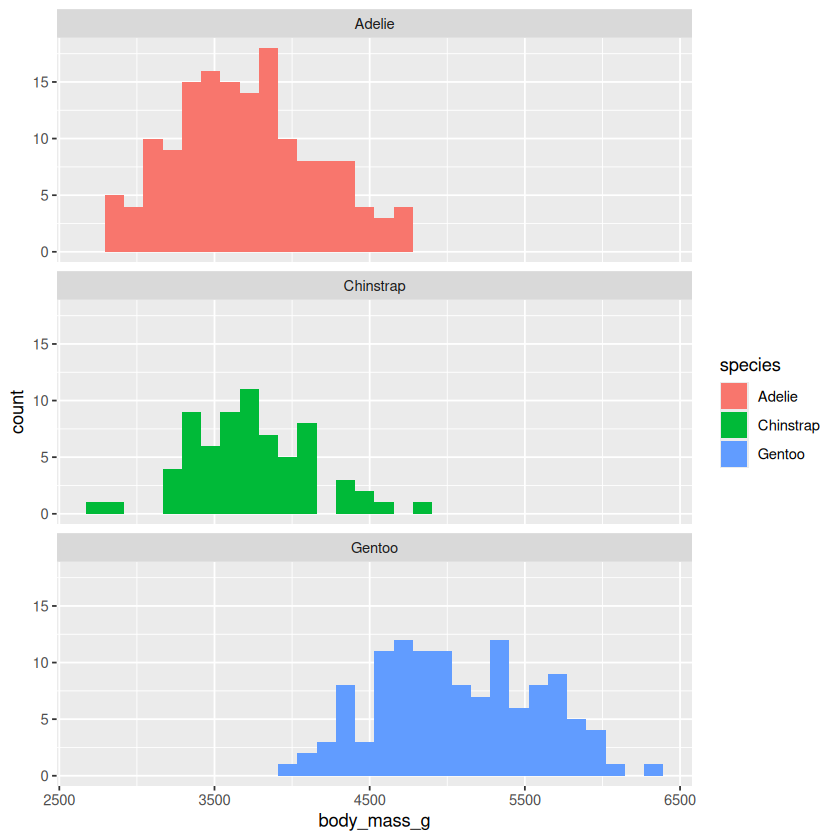

In [33]:

penguins |>
  ggplot(aes(x = body_mass_g, fill = species)) +
  geom_histogram() +
  facet_wrap(facets = vars(species), ncol = 1)

***-> The distribution of body mass is different across these penguin species, being the ones belonging to Gentoo species generally heavier while Adelie and Chinstrap penguins tend to have a similar weight.***

---
## Conclusion
We have examined
- making ggplot histograms
- altering bin widths
- including different groups
- altering visual properties
- exporting plots